https://github.com/BrandonReyes0609/VP-Lab3.git

https://github.com/BrandonReyes0609/VP-Lab3.git

Laboratorio 3 Visión por computadora

 - Nancy Mazariegos – 22513 
 - Brandon Reyes – 22992 
 - Santiago Pereira – 22318 

# Task 1

## parte 1

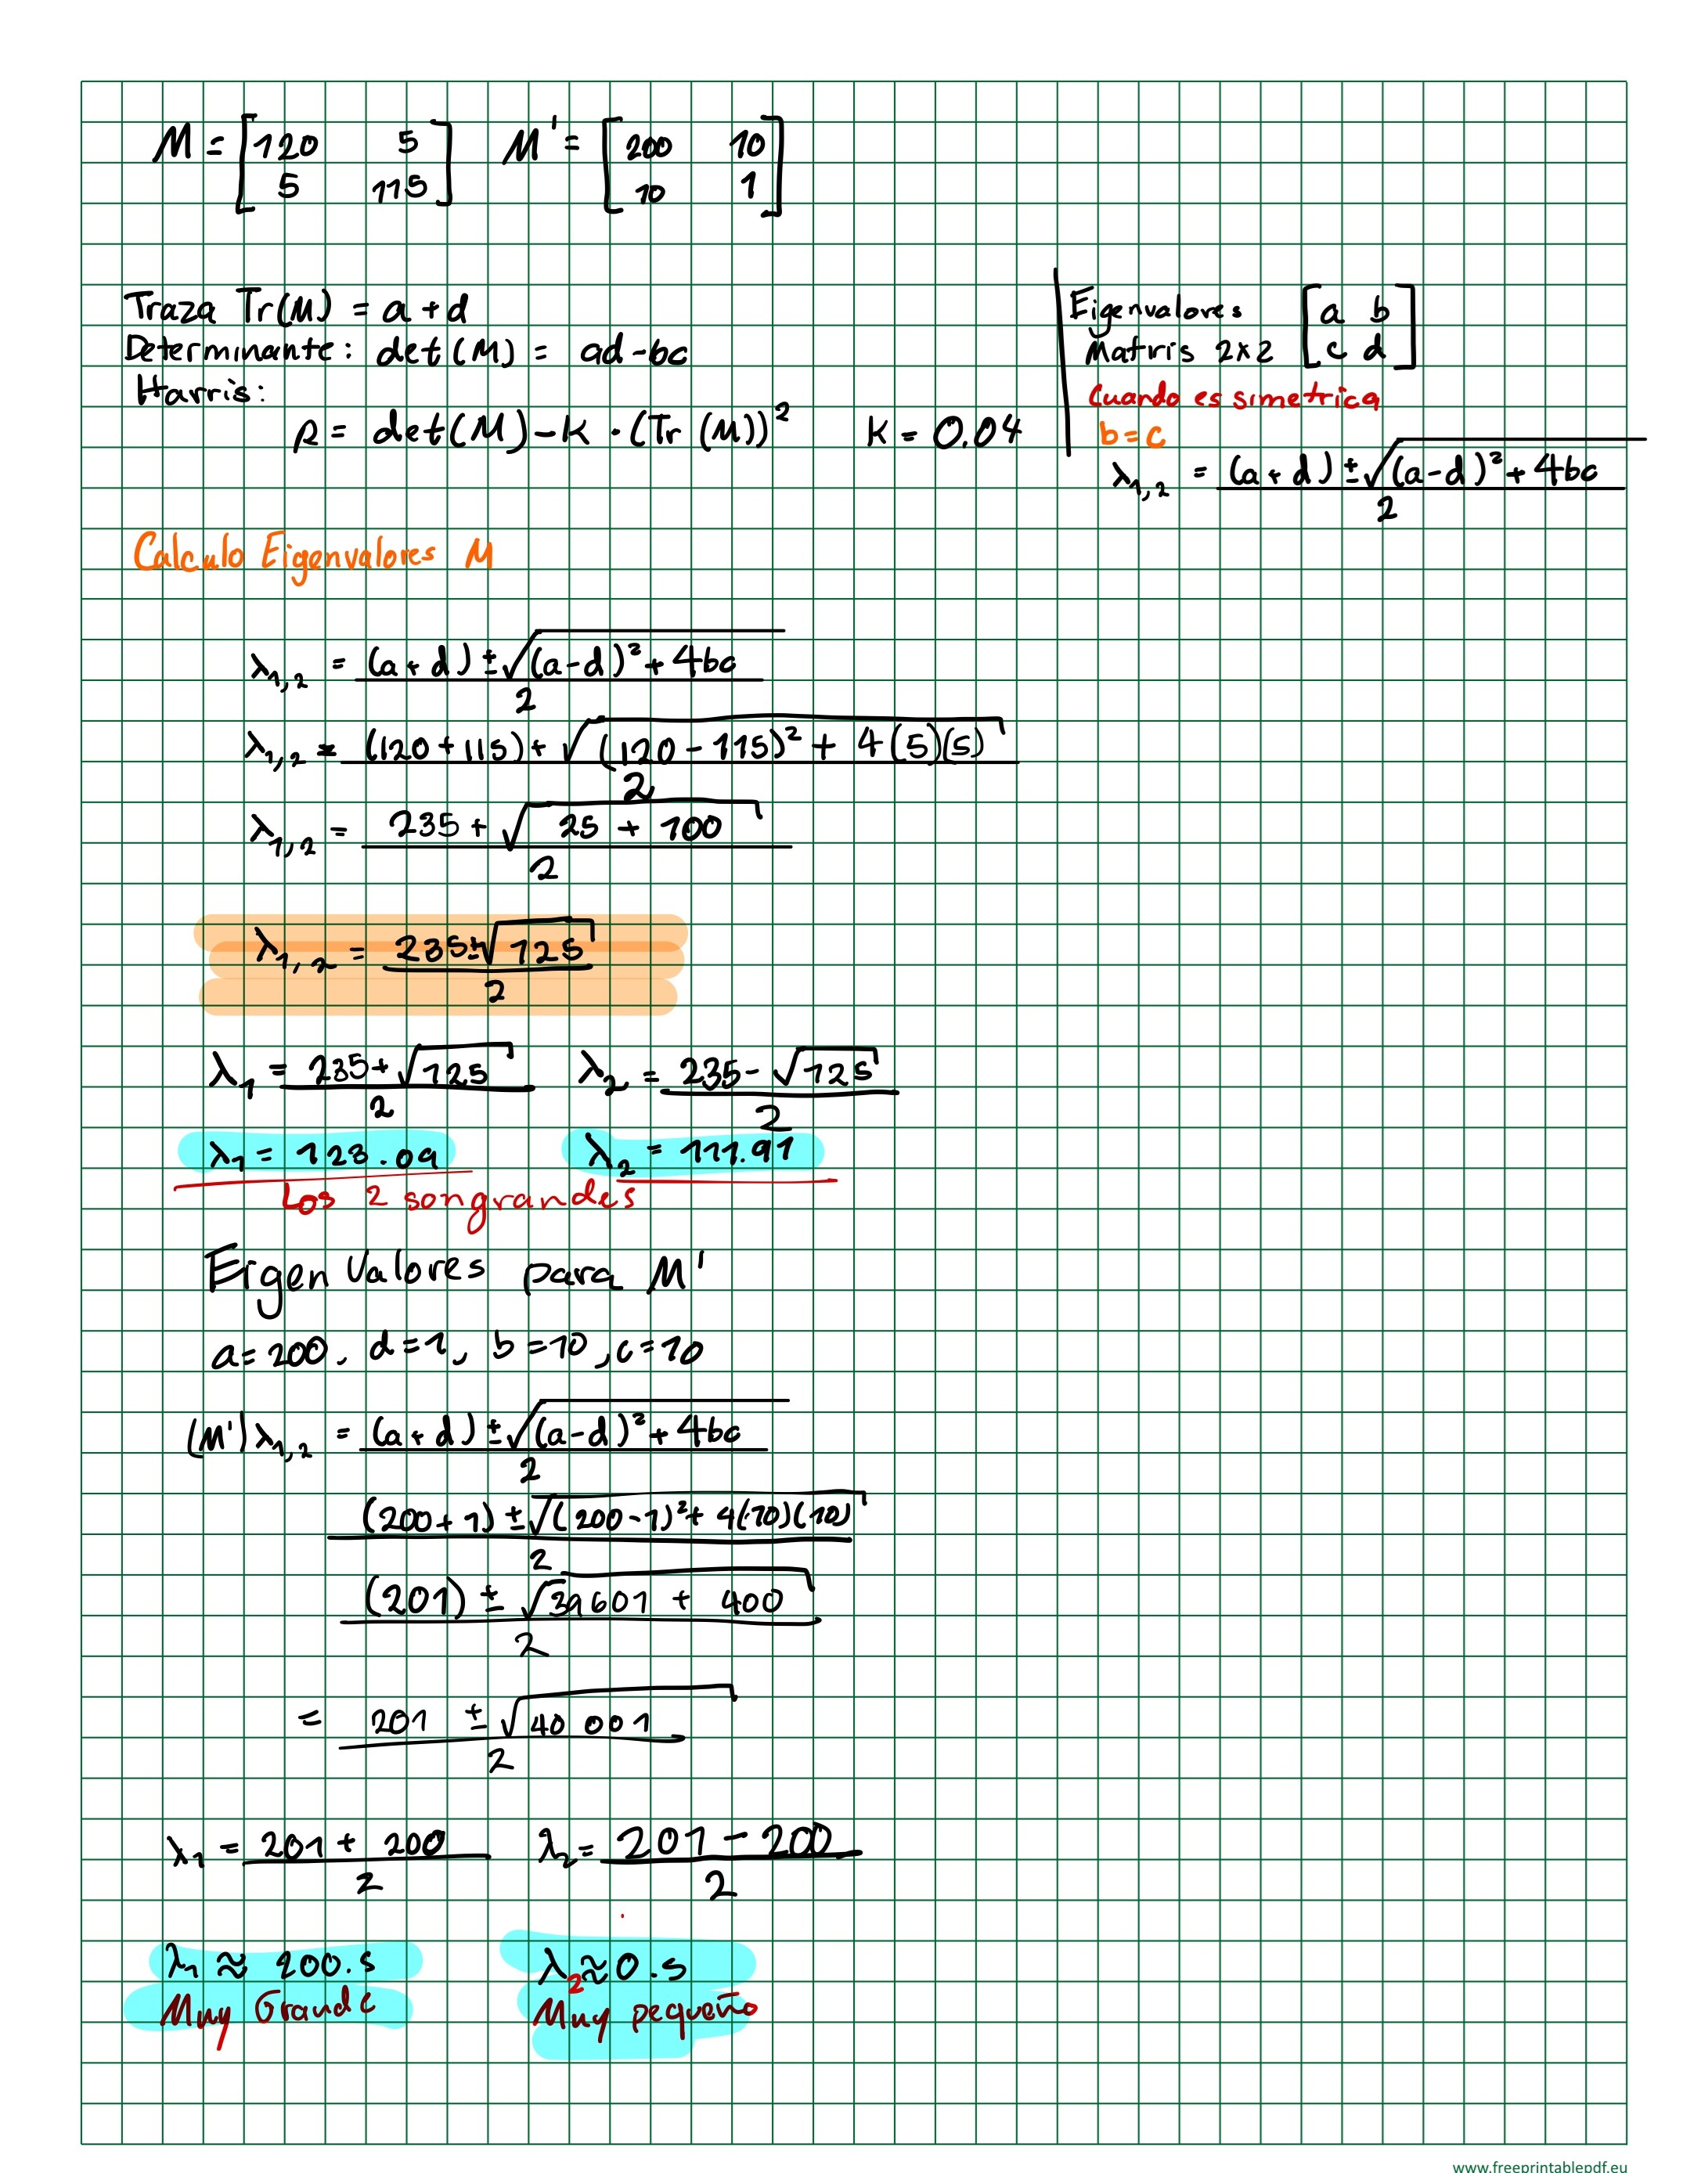

## parte 2

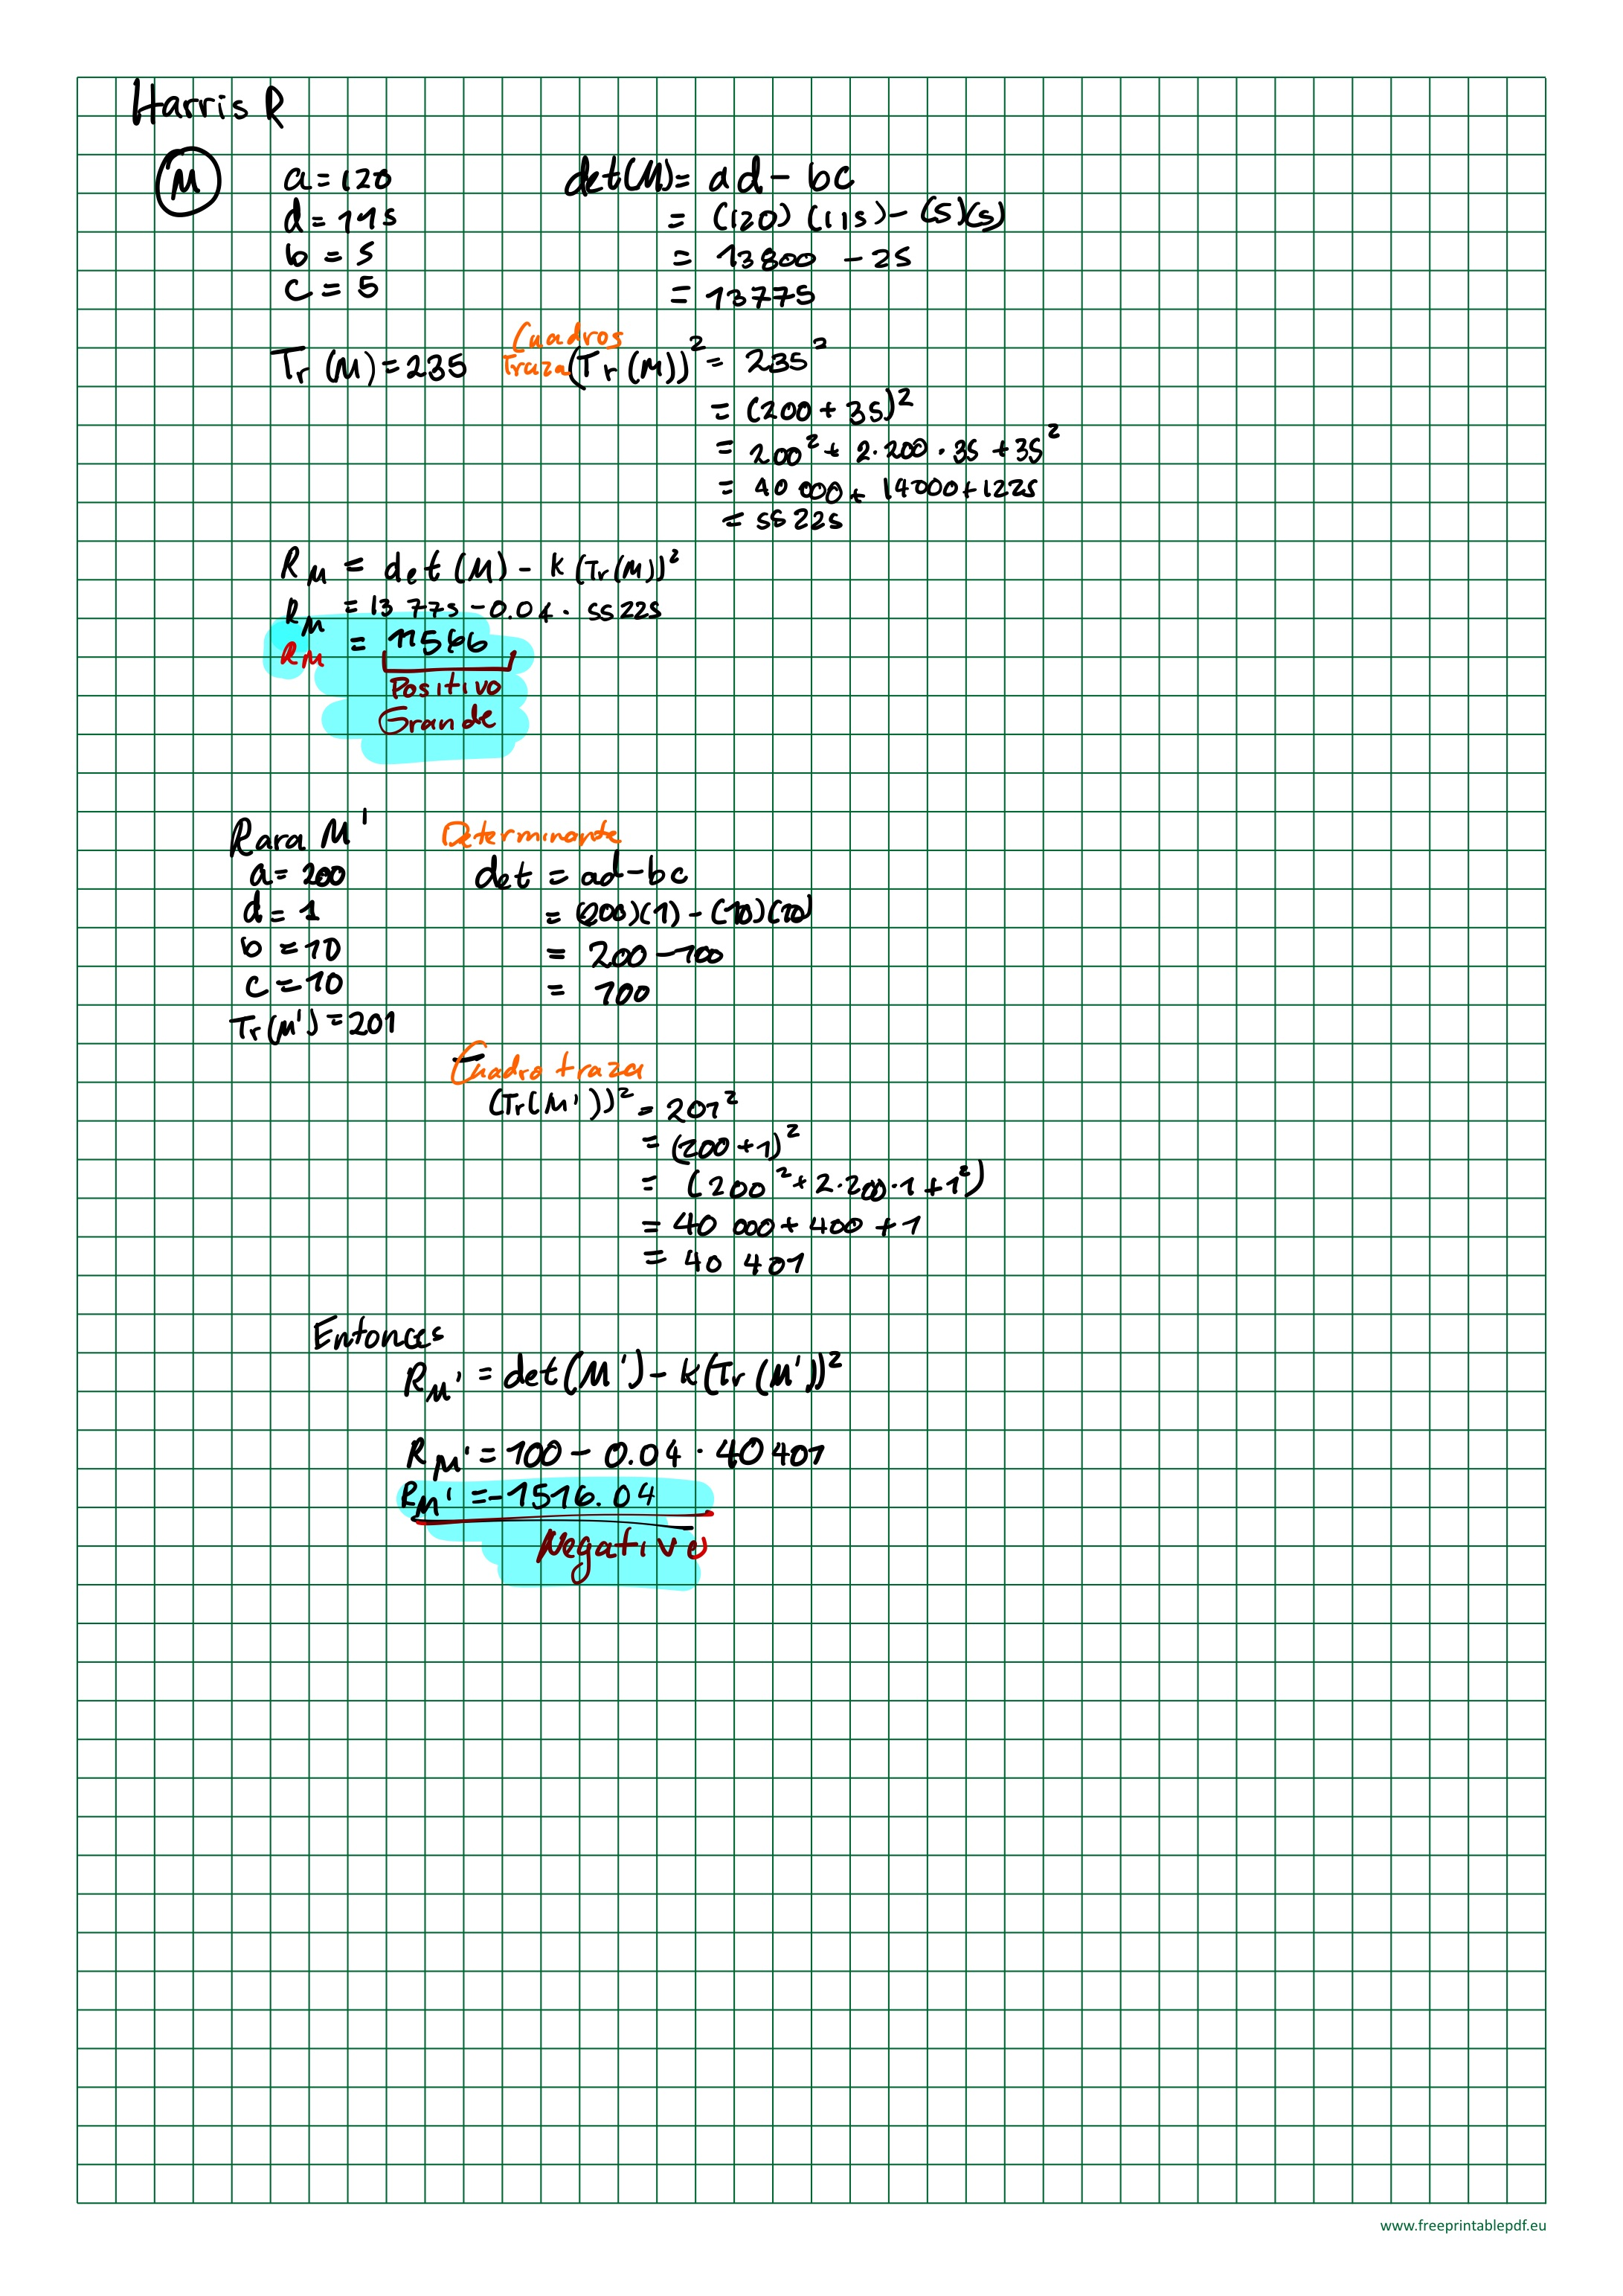

## Parte 3
### Matriz M
- Para λ_1 = 123.1 y  λ_2= 111.9
    -  En este caso los valores son grandes
    - Magnitud similar
Entonces λ_1 y λ_2 son comprables y grante por lo cual la intensidad de la imagen cambia fuerte en dos direc ciones distintas alrededor del piel. Por lo cual es una esquina 


### Para matriz M'
- Para λ_1 = 200.5 y  λ_2= 0.5 
    -  λ_1 es muy grande 
    - λ_2 es muy pequeño cercano a cero

Entonces λ_1 y λ_2,uno de los eigenvalores es muy grande y el otro es muy pequeño. Por lo tanto que la intensidad de la imagen cambia mucho solo en una dirección, mientras que en la dirección perpendicular casi no cambia. Esa situación corresponde a un borde porque cuando cruzas el borde la intensidad varía bastante, pero si te mueves siguiendo el borde casi no hay diferencia.


## Task 2

In [ ]:
import cv2
import numpy as np


imagen1 = cv2.imread('ironman.jpeg', cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread('ironman2.jpeg', cv2.IMREAD_GRAYSCALE)


sift = cv2.SIFT_create()
puntos_clave1_sift, descriptores1_sift = sift.detectAndCompute(imagen1, None)
puntos_clave2_sift, descriptores2_sift = sift.detectAndCompute(imagen2, None)

orb = cv2.ORB_create()
puntos_clave1_orb, descriptores1_orb = orb.detectAndCompute(imagen1, None)
puntos_clave2_orb, descriptores2_orb = orb.detectAndCompute(imagen2, None)


emparejador_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
coincidencias_sift = emparejador_sift.knnMatch(descriptores1_sift, descriptores2_sift, k=2)


emparejador_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
coincidencias_orb = emparejador_orb.knnMatch(descriptores1_orb, descriptores2_orb, k=2)

buenas_coincidencias_sift = []
for mejor, segundo_mejor in coincidencias_sift:
    if mejor.distance < 0.75 * segundo_mejor.distance:
        buenas_coincidencias_sift.append(mejor)


buenas_coincidencias_orb = []
for par_coincidencia in coincidencias_orb:
    if len(par_coincidencia) == 2:
        mejor, segundo_mejor = par_coincidencia
        if mejor.distance < 0.75 * segundo_mejor.distance:
            buenas_coincidencias_orb.append(mejor)

def dibujar_lineas_correspondencia(img1, puntos_clave1, img2, puntos_clave2, buenas_coincidencias):

    altura1, ancho1 = img1.shape
    altura2, ancho2 = img2.shape
    
    altura_salida = max(altura1, altura2)
    ancho_salida = ancho1 + ancho2
    
    imagen_salida = np.zeros((altura_salida, ancho_salida, 3), dtype=np.uint8)
    
    imagen1_bgr = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    imagen2_bgr = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    
    imagen_salida[0:altura1, 0:ancho1] = imagen1_bgr
    
    imagen_salida[0:altura2, ancho1:ancho1+ancho2] = imagen2_bgr
    
    for coincidencia in buenas_coincidencias:
        punto1 = puntos_clave1[coincidencia.queryIdx].pt
        x1, y1 = int(punto1[0]), int(punto1[1])
        
        punto2 = puntos_clave2[coincidencia.trainIdx].pt
        x2, y2 = int(punto2[0]) + ancho1, int(punto2[1])
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        
        cv2.circle(imagen_salida, (x1, y1), 5, color, 2)
        
        cv2.circle(imagen_salida, (x2, y2), 5, color, 2)
        
        cv2.line(imagen_salida, (x1, y1), (x2, y2), color, 1)
    
    return imagen_salida


imagen_correspondencias_sift = dibujar_lineas_correspondencia(
    imagen1, puntos_clave1_sift, 
    imagen2, puntos_clave2_sift, 
    buenas_coincidencias_sift, 
)

imagen_correspondencias_orb = dibujar_lineas_correspondencia(
    imagen1, puntos_clave1_orb, 
    imagen2, puntos_clave2_orb, 
    buenas_coincidencias_orb, 
)


cv2.imshow('SIFT', imagen_correspondencias_sift)
cv2.imshow('ORB', imagen_correspondencias_orb)

cv2.imwrite('sift.jpg', imagen_correspondencias_sift)
cv2.imwrite('orb.jpg', imagen_correspondencias_orb)


cv2.waitKey(0)
cv2.destroyAllWindows()

## Task 3

1. Usando librerías como time o o timeit para medir tiempo por separado, mida:

a. Tiempo promedio de Detección + Descripción (en milisegundos)

b. Tiempo promedio de Matching (en milisegundos)

c. Asegurese de realizar esto apra ambos algoritmos de la parte 2 (SIFT y ORB)

2. Cree una tabla en su reporte con las siguientes columnas:

a. Algoritmo

b. Tiempo total (en milisegundos)

c. Número de Keypoints detectados (Imagen A / Imagen B)

d. Número de Matches “Buenos” (post-Ratio Test)

| Algoritmo | Tiempo total (ms) | Keypoints (Imagen A / Imagen B) | Matches "Buenos" |
|----------|------------------|---------------------------------|------------------|
| SIFT     | 16.29            | 129 / 107                       | 8                |
| ORB      | 2.08             | 206 / 328                       | 4                |


3. Finalmente, realice un análisis crítico, para ello responda

a. ¿Cuál algoritmo elegiría para el Producto A (Drone de Carreras) y por qué? Base su
respuesta en los milisegundos que mediste y la tasa de refresco requerida (60 FPS ≈ 16ms
de presupuesto total).

**R//** Elegiría ORB porque es mucho más rápido por que ORB tarda 2.08 ms, muy por debajo del límite de 16 ms para 60 FPS, mientras que SIFT tarda 16.29 ms, quedando justo en el límite y no siendo seguro para tiempo real.

b. ¿Cuál algoritmo elegirías para el Producto B (Inspección) y por qué? Analice la calidad
visual de los matches en los cambios de escala y rotación que probaste. ¿Falló ORB en
algún caso donde SIFT tuvo éxito?

**R//** Elegiría SIFT porque sus matches son más confiables, aunque es más lento, maneja mejor cambios de escala y rotación que ORB, lo cual es clave para inspección precisa.

c. ¿Las conclusiones que estamos alcanzando son justas y generalizables? ¿Por qué? ¿Qué
deberíamos considerar en futuras iteraciones?

**R//** No del todo, por que solo se probaron dos imágenes de un mismo objeto.
Para conclusiones más generales se necesitarían más escenas/imágenes y condiciones distintas.

In [2]:
import cv2
import numpy as np
import time

imagen1 = cv2.imread('ironman.jpeg', cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread('ironman2.jpeg', cv2.IMREAD_GRAYSCALE)

if imagen1 is None or imagen2 is None:
    raise FileNotFoundError("Error al cargar las imágenes")

RATIO = 0.75

def ratio_test(knn_matches, ratio=0.75):
    buenas = []
    for par in knn_matches:
        if len(par) == 2:
            m, n = par
            if m.distance < ratio * n.distance:
                buenas.append(m)
    return buenas

def dibujar_lineas_correspondencia(img1, puntos_clave1, img2, puntos_clave2, buenas_coincidencias):
    altura1, ancho1 = img1.shape
    altura2, ancho2 = img2.shape
    
    altura_salida = max(altura1, altura2)
    ancho_salida = ancho1 + ancho2
    
    imagen_salida = np.zeros((altura_salida, ancho_salida, 3), dtype=np.uint8)
    
    imagen1_bgr = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    imagen2_bgr = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    
    imagen_salida[0:altura1, 0:ancho1] = imagen1_bgr
    imagen_salida[0:altura2, ancho1:ancho1+ancho2] = imagen2_bgr
    
    for coincidencia in buenas_coincidencias:
        punto1 = puntos_clave1[coincidencia.queryIdx].pt
        x1, y1 = int(punto1[0]), int(punto1[1])
        
        punto2 = puntos_clave2[coincidencia.trainIdx].pt
        x2, y2 = int(punto2[0]) + ancho1, int(punto2[1])
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        cv2.circle(imagen_salida, (x1, y1), 5, color, 2)
        cv2.circle(imagen_salida, (x2, y2), 5, color, 2)
        cv2.line(imagen_salida, (x1, y1), (x2, y2), color, 1)
    
    return imagen_salida

N_RUNS = 20  

def medir_sift_orb(nombre, detector, matcher, img1, img2, n_runs=20, ratio=0.75):
    tiempos_det_desc = []
    tiempos_match = []

    kp1_final = kp2_final = None
    good_final = []

    for _ in range(n_runs):
        t0 = time.perf_counter()
        kp1, des1 = detector.detectAndCompute(img1, None)
        kp2, des2 = detector.detectAndCompute(img2, None)
        t1 = time.perf_counter()
        tiempos_det_desc.append((t1 - t0) * 1000)  

        if des1 is None or des2 is None or len(des1) == 0 or len(des2) == 0:
            tiempos_match.append(0.0)
            kp1_final, kp2_final, good_final = kp1, kp2, []
            continue

        t2 = time.perf_counter()
        knn = matcher.knnMatch(des1, des2, k=2)
        good = ratio_test(knn, ratio=ratio)
        t3 = time.perf_counter()
        tiempos_match.append((t3 - t2) * 1000)  

        kp1_final, kp2_final, good_final = kp1, kp2, good

    prom_det_desc = sum(tiempos_det_desc) / len(tiempos_det_desc)
    prom_match = sum(tiempos_match) / len(tiempos_match)
    prom_total = prom_det_desc + prom_match

    return {
        "Algoritmo": nombre,
        "Det+Desc (ms)": prom_det_desc,
        "Matching (ms)": prom_match,
        "Total (ms)": prom_total,
        "Keypoints A": 0 if kp1_final is None else len(kp1_final),
        "Keypoints B": 0 if kp2_final is None else len(kp2_final),
        "Buenos matches": len(good_final),
        "kp1": kp1_final,
        "kp2": kp2_final,
        "good": good_final
    }

sift = cv2.SIFT_create()
orb = cv2.ORB_create()

bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
bf_orb  = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

res_sift = medir_sift_orb("SIFT", sift, bf_sift, imagen1, imagen2, n_runs=N_RUNS, ratio=RATIO)
res_orb  = medir_sift_orb("ORB",  orb,  bf_orb,  imagen1, imagen2, n_runs=N_RUNS, ratio=RATIO)

print("Resultados en promedios")
for r in [res_sift, res_orb]:
    print(
        f"{r['Algoritmo']}: Det+Desc={r['Det+Desc (ms)']:.2f} ms | "
        f"Matching={r['Matching (ms)']:.2f} ms | Total={r['Total (ms)']:.2f} ms | "
        f"Keypoints(A/B)=({r['Keypoints A']}/{r['Keypoints B']}) | "
        f"Buenos matches={r['Buenos matches']}"
    )

img_sift = dibujar_lineas_correspondencia(imagen1, res_sift["kp1"], imagen2, res_sift["kp2"], res_sift["good"])
img_orb  = dibujar_lineas_correspondencia(imagen1, res_orb["kp1"],  imagen2, res_orb["kp2"],  res_orb["good"])

cv2.imwrite("sift_task3.jpg", img_sift)
cv2.imwrite("orb_task3.jpg", img_orb)

cv2.imshow("SIFT - Task 3", img_sift)
cv2.imshow("ORB - Task 3", img_orb)
cv2.waitKey(0)
cv2.destroyAllWindows()


Resultados en promedios
SIFT: Det+Desc=10.09 ms | Matching=0.11 ms | Total=10.20 ms | Keypoints(A/B)=(129/107) | Buenos matches=8
ORB: Det+Desc=1.94 ms | Matching=0.18 ms | Total=2.11 ms | Keypoints(A/B)=(206/328) | Buenos matches=4
